# Rf 9 0 3_Numintcache

Numeric algorithm tuning: caching of slow numeric integrals and parameterizations of slow numeric integrals




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:07 AM.</small></i>

In [1]:
import sys
import ROOT


def getWorkspace(mode):
    # Create, save or load workspace with pdf
    # -----------------------------------------------------------------------------------
    #
    # Mode = 0 : Create workspace for plain running (no integral caching)
    # Mode = 1 : Generate workspace with precalculated integral and store it on file
    # Mode = 2 : Load previously stored workspace from file

    w = ROOT.RooWorkspace()

    if mode != 2:
        # Create empty workspace workspace
        w = ROOT.RooWorkspace("w", 1)

        # Make a difficult to normalize  p.d.f. in 3 dimensions that is
        # integrated numerically.
        w.factory(
            "EXPR::model('1/((x-a)*(x-a)+0.01)+1/((y-a)*(y-a)+0.01)+1/((z-a)*(z-a)+0.01)',x[-1,1],y[-1,1],z[-1,1],a[-5,5])")

    if mode == 1:
        # Instruct model to precalculate normalization integral that integrate at least
        # two dimensions numerically. In self specific case the integral value for
        # all values of parameter 'a' are stored in a histogram and available for use
        # in subsequent fitting and plotting operations (interpolation is
        # applied)

        # w.pdf("model").setNormValueCaching(3)
        w.pdf("model").setStringAttribute("CACHEPARMINT", "x:y:z")

        # Evaluate p.d.f. once to trigger filling of cache
        normSet = ROOT.RooArgSet(w.var("x"), w.var("y"), w.var("z"))
        w.pdf("model").getVal(normSet)
        w.writeToFile("rf903_numintcache.root")

    if (mode == 2):
        # Load preexisting workspace from file in mode==2
        f = ROOT.TFile("rf903_numintcache.root")
        w = f.Get("w")

    # Return created or loaded workspace
    return w


mode = 0

Welcome to JupyROOT 6.18/03


Mode = 0 : Run plain fit (slow)
Mode = 1 : Generate workspace with precalculated integral and store it on file (prepare for accelerated running)
Mode = 2 : Run fit from previously stored workspace including cached
integrals (fast, run in mode=1 first)

Create, save or load workspace with pdf
-----------------------------------------------------------------------------------

Make/load workspace, here in mode 1

In [2]:
w = getWorkspace(mode)
if mode == 1:
    # Show workspace that was created
    w.Print()

    # Show plot of cached integral values
    hhcache = w.expensiveObjectCache().getObj(1)
    if (hhcache):
        ROOT.TCanvas("rf903_numintcache", "rf903_numintcache", 600, 600)
        hhcache.createHistogram("a").Draw()
    else:
        ROOT.RooFit.Error("rf903_numintcache",
                          "Cached histogram is not existing in workspace")
        sys.exit()


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:ObjectHandling -- RooWorkspace::exportToCint(w) INFO: references to all objects in this workspace will be created in CINT in 'namespace w'


Use pdf from workspace for generation and fitting
-----------------------------------------------------------------------------------

ROOT.This is always slow (need to find maximum function value
empirically in 3D space)

In [3]:
d = w.pdf("model").generate(
    ROOT.RooArgSet(
        w.var("x"),
        w.var("y"),
        w.var("z")),
    1000)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y,z]) using numeric integrator RooAdaptiveIntegratorND to calculate Int(x,y,z)


ROOT.This is slow in mode 0, fast in mode 1

In [4]:
w.pdf("model").fitTo(
    d, ROOT.RooFit.Verbose(
        ROOT.kTRUE), ROOT.RooFit.Timer(
            ROOT.kTRUE))

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- createNLL: caching constraint set under name CONSTR_OF_PDF_model_FOR_OBS_x:y:z with 0 entries
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#0] WARNING:Minization -- RooMinimizerFcn::synchronize: WARNING: no initial error estimate available for a: using 1
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a            0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.

prevFCN = 1659.930708   START MIGRAD MINIMIZATION.  STRATEGY  1.

Projection on x (always slow as 2D integral over Y, at fitted value of a
is not cached)

In [5]:
framex = w.var("x").frame(ROOT.RooFit.Title("Projection of 3D model on X"))
d.plotOn(framex)
w.pdf("model").plotOn(framex)

<ROOT.RooPlot object ("frame_x_55f8a3015f90") at 0x55f8a3015f90>

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on x integrates over variables (y,z)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[y,z]_Norm[x,y,z]) using numeric integrator RooAdaptiveIntegratorND to calculate Int(y,z)


Draw x projection on canvas

In [6]:
c = ROOT.TCanvas("rf903_numintcache", "rf903_numintcache", 600, 600)
framex.Draw()

c.SaveAs("rf903_numintcache.png")

Info in <TCanvas::Print>: png file rf903_numintcache.png has been created


Make workspace available on command line after macro finishes

In [7]:
ROOT.gDirectory.Add(w)

Draw all canvases 

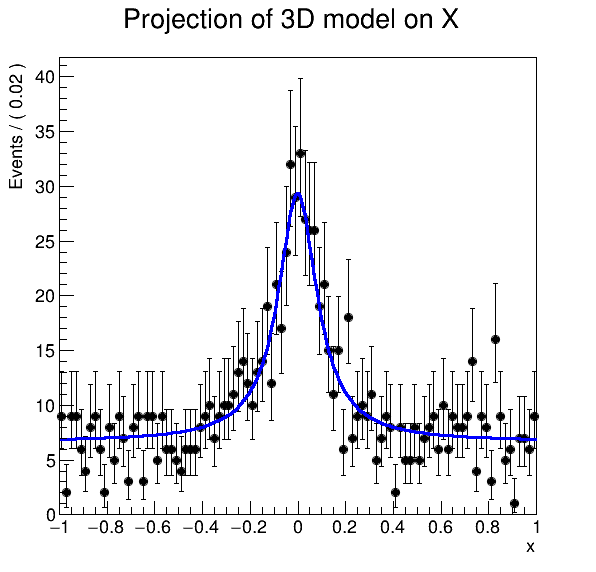

In [8]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()